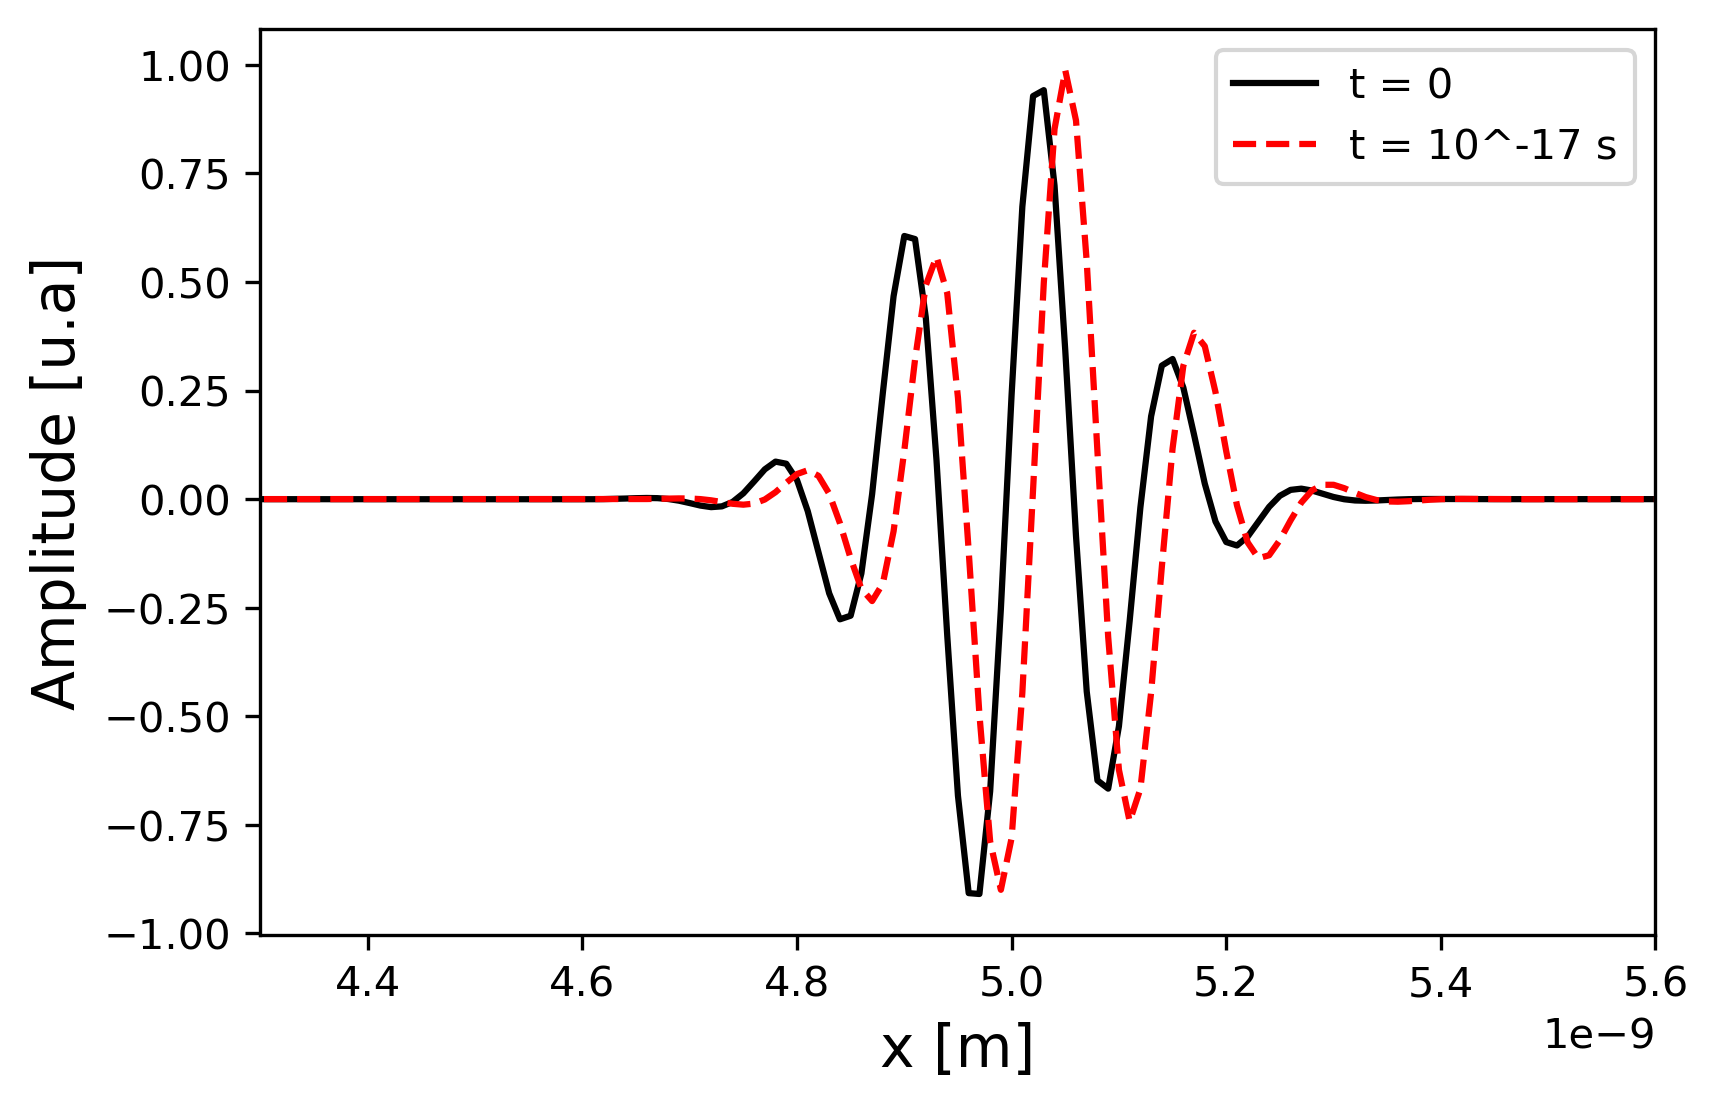

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from banded import banded

'''
Cálculo da evolução de pacote de onda gaussiano
por meio da resolução da equação de Schrodinger
dependente do tempo por meio do método de Crank
Nicholson.
'''

# Constantes
L     = 1e-8         # Dimensão do poço de potencial [m] 
m     = 9.109e-31    # Massa do elétron [kg] 
h_bar = 1.054e-34    # Constante de planck reduzida [J*s] 
N     = 1000         # Número de pontos
a     = L/N          # Espaçamento dos pontos [m] 
h     = 1e-17        # Intervalo de tempo [s]
i     = complex(0,1)
    
# Parâmetros da condição inicial
x_0 = L/2     #[m]
sig = 1e-10   #[m]
k   = 5e10    #[m]

# Condição inicial da função de onda
def wave_f_0(x):
    return np.exp(-(x-x_0)**2/(2*sig**2))*np.exp(i*k*x)

X     = np.arange(0,L,a)
psi_0 = wave_f_0(X)

# Coeficientes para as matrizes tridiagonais
b2 = h*(i*h_bar)/(4*m*a**2)
b1 = 1 - 2*b2
a2 = -h*(i*h_bar)/(4*m*a**2)
a1 = 1 - 2*a2

# Vetor solução do sistema
v = np.zeros(N,complex)
v[1:N-1] = b1*psi_0[1:N-1] + b2*(psi_0[2:N] + psi_0[0:N-2])

# Gerando a matrix A
A = np.zeros([3,N], complex)
A[0,:] = a2
A[1,:] = a1
A[2,:] = a2

# Resolvendo o sistema
psi = banded(A,v,1,1)

plt.figure()
plt.plot(X,psi_0.real,'-k', label = 't = 0')
plt.plot(X,psi.real,'--r', label = 't = 10^-17 s')
plt.legend(loc = 'best')
plt.xlabel('x [m]', size = 14)
plt.ylabel('Amplitude [u.a]', size = 14)
plt.xlim(4.3e-9, 5.6e-9)
plt.show()